## Breast Cnacer Prediction

### 1. Load libraries

In [1]:
#import all the libraries used 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### 2. Load Data 

In [2]:
#load the dataset using read_csv from pandas library
df = pd.read_csv("breast_cancer_data.csv")

#first few rows of data to get basic idea of dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3. Clean and prepare the data

In [3]:
# from the df.head() output we can see that there is one "unnnaamed" column with NAN values. also the column "id" is not 
# useful for analysis. So, we will remove both the columns

df.drop( columns = ['id', 'Unnamed: 32'], inplace = True )

In [4]:
#check the shape od dataframe
df.shape

(569, 31)

In [5]:
# we have 569 samples and 31 columns. 
# Out of 31 columns 30 are mean, standard error and extreme values of ten features calculated of each sample cells.
# one column - diagnosis is the variable that we will predict.
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Check for missing or null data points
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# From the results we can see that there are no missing values ot null values in the dataset

#### Categorical data

In [9]:
print(df.diagnosis.unique())
df['diagnosis'].value_counts().to_frame()
# We can see that out of 569 samples we have 212 samples with malignant breast cancer and 357 with benign

['M' 'B']


,diagnosis
B,357
M,212


In [10]:
# Check the basic summary of the numerical columns like mean, std, minimum, maximum and quartiles
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 4. EDA

#### with different plots we will check the features with major impact and that can be used for classification

### for mean value of features

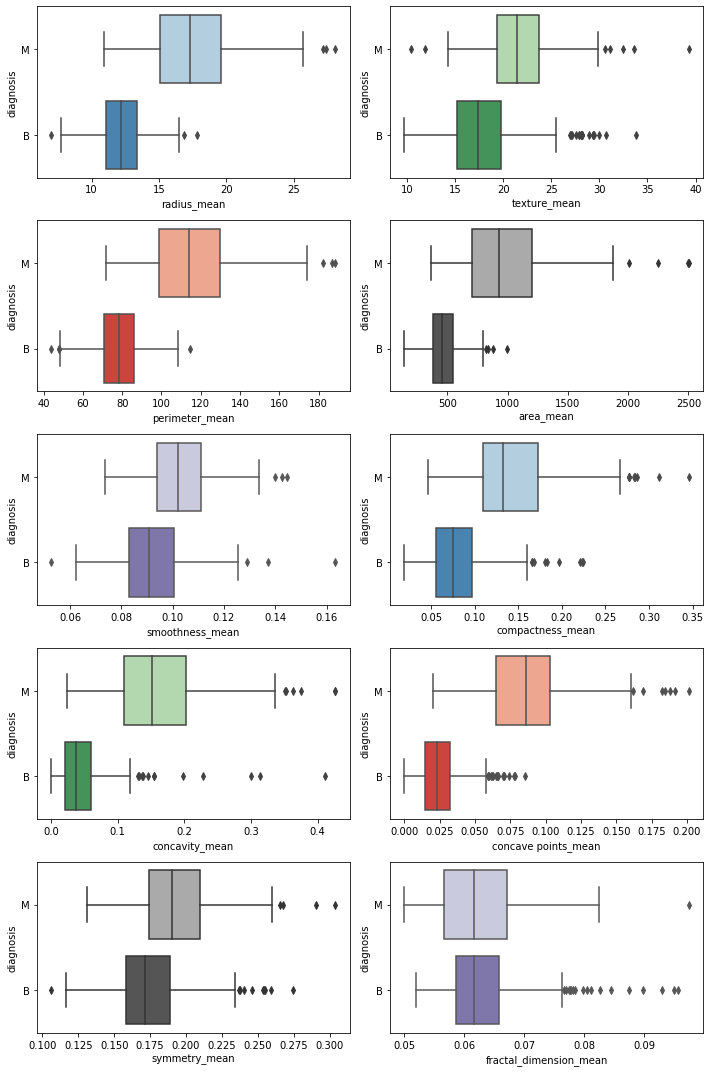

In [11]:
f,a = plt.subplots( nrows = 5, ncols = 2, figsize = (10,15))
sns.boxplot(  y="diagnosis", x= "radius_mean", data=df,  orient='h' , palette = 'Blues', ax=a[0][0])
sns.boxplot(  y="diagnosis", x= "texture_mean", data=df,  orient='h' , palette = 'Greens', ax=a[0][1])
sns.boxplot(  y="diagnosis", x= "perimeter_mean", data=df,  orient='h' , palette = 'Reds', ax=a[1][0])
sns.boxplot(  y="diagnosis", x= "area_mean", data=df,  orient='h' , palette = 'binary', ax=a[1][1])
sns.boxplot(  y="diagnosis", x= "smoothness_mean", data=df,  orient='h' , palette = 'Purples', ax=a[2][0])
sns.boxplot(  y="diagnosis", x= "compactness_mean", data=df,  orient='h' , palette = 'Blues', ax=a[2][1])
sns.boxplot(  y="diagnosis", x= "concavity_mean", data=df,  orient='h' , palette = 'Greens', ax=a[3][0])
sns.boxplot(  y="diagnosis", x= "concave points_mean", data=df,  orient='h' , palette = 'Reds', ax=a[3][1])
sns.boxplot(  y="diagnosis", x= "symmetry_mean", data=df,  orient='h' , palette = 'binary', ax=a[4][0])
sns.boxplot(  y="diagnosis", x= "fractal_dimension_mean", data=df,  orient='h' , palette = 'Purples', ax=a[4][1])
plt.tight_layout()

#### From the above graphs we can see that there are not any particular outilers in th data which we should remove or clean


Also, we can notice that mean value of radius, perimeter, area, compactness, concavity and concave points can be used in 
classification of the cancer. As from the graph it can be observed that larger values of these features have correlation 
with malignant tumors

Mean values of texture, smoothness and symmetry have some impact on classification of tumor malignant or benign

But, fractal dimension mean values are not showing any particular preference for one diagnosis over other

We can check these results of EDA with hypothesis testing anf later build the model on these features.



### 5. Hypothesis building and Testing

#### from above EDA results we can build hypothesis that
#### 1. Values mean of radius, perimeter, area, compactness, concavity, concave points, texture, smoothness and symmetry have impact on classification of tumor malignant or benign

#### 2. No difference in  fractal_dimension for benign or malignant tumor

#### we will use ANOVA test to check if these hypothesis are correct or not

### Radius_mean

In [12]:
## ANOVA for mean_radius
## Null hypothesis: there is no difference in radius_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in radius_mean for Malignant and Benign tumor
    
df_anova = df[['radius_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['radius_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in radius_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in radius_mean for Malignant and Benign tumor")

p-value for significance is:  8.46594057226382e-96
reject null hypothesis
Alternate hypothesis: there is difference in radius_mean for Malignant and Benign tumor


### Texture_mean

In [13]:
## ANOVA for texture_mean
## Null hypothesis: there is no difference in texture_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in texture_mean for Malignant and Benign tumor
    
df_anova = df[['texture_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['texture_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in texture_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in texture_mean for Malignant and Benign tumor")

p-value for significance is:  4.0586360478986136e-25
reject null hypothesis
Alternate hypothesis: there is difference in texture_mean for Malignant and Benign tumor


### perimeter_mean

In [14]:
## ANOVA for perimeter_mean
## Null hypothesis: there is no difference in perimeter_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in perimeter_mean for Malignant and Benign tumor
    
df_anova = df[['perimeter_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['perimeter_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in perimeter_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in perimeter_mean for Malignant and Benign tumor")

p-value for significance is:  8.43625103617395e-101
reject null hypothesis
Alternate hypothesis: there is difference in perimeter_mean for Malignant and Benign tumor


### area_mean

In [15]:
## ANOVA for area_mean
## Null hypothesis: there is no difference in area_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in area_mean for Malignant and Benign tumor
    
df_anova = df[['area_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['area_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in area_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in area_mean for Malignant and Benign tumor")

p-value for significance is:  4.7345643103077244e-88
reject null hypothesis
Alternate hypothesis: there is difference in area_mean for Malignant and Benign tumor


### smoothness_mean

In [16]:
## ANOVA for smoothness_mean
## Null hypothesis: there is no difference in smoothness_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in smoothness_mean for Malignant and Benign tumor
    
df_anova = df[['smoothness_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['smoothness_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in smoothness_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in smoothness_mean for Malignant and Benign tumor")

p-value for significance is:  1.0518503592033238e-18
reject null hypothesis
Alternate hypothesis: there is difference in smoothness_mean for Malignant and Benign tumor


### compactness_mean

In [17]:
## ANOVA for compactness_mean
## Null hypothesis: there is no difference in compactness_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in compactness_mean for Malignant and Benign tumor
    
df_anova = df[['compactness_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['compactness_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in compactness_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in compactness_mean for Malignant and Benign tumor")

p-value for significance is:  3.938263105887389e-56
reject null hypothesis
Alternate hypothesis: there is difference in compactness_mean for Malignant and Benign tumor


### concavity_mean

In [18]:
## ANOVA for concavity_mean
## Null hypothesis: there is no difference in concavity_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in concavity_mean for Malignant and Benign tumor
    
df_anova = df[['concavity_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['concavity_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in concavity_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in concavity_mean for Malignant and Benign tumor")

p-value for significance is:  9.966555755074321e-84
reject null hypothesis
Alternate hypothesis: there is difference in concavity_mean for Malignant and Benign tumor


### concave points_mean

In [19]:
## ANOVA for concave points_mean
## Null hypothesis: there is no difference in concave points_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in concave points_mean for Malignant and Benign tumor
    
df_anova = df[['concave points_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['concave points_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in concave points_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in concave points_mean for Malignant and Benign tumor")

p-value for significance is:  7.101150161059154e-116
reject null hypothesis
Alternate hypothesis: there is difference in concave points_mean for Malignant and Benign tumor


### symmetry_mean

In [20]:
## ANOVA for symmetry_mean
## Null hypothesis: there is no difference in symmetry_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in symmetry_mean for Malignant and Benign tumor
    
df_anova = df[['symmetry_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['symmetry_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in symmetry_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in symmetry_mean for Malignant and Benign tumor")

p-value for significance is:  5.73338402846732e-16
reject null hypothesis
Alternate hypothesis: there is difference in symmetry_mean for Malignant and Benign tumor


### fractal_dimension_mean

In [21]:
## ANOVA for fractal_dimension_mean
## Null hypothesis: there is no difference in fractal_dimension_mean for Malignant and Benign tumor
## Alternate hypothesis: there is difference in fractal_dimension_mean for Malignant and Benign tumor
    
df_anova = df[['fractal_dimension_mean','diagnosis']]
grps = pd.unique(df_anova.diagnosis.values)
d_data = {grp:df_anova['fractal_dimension_mean'][df_anova.diagnosis == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['M'], d_data['B'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
    print("Alternate hypothesis: there is difference in fractal_dimension_mean for Malignant and Benign tumor")
else:
    print("accept null hypothesis")
    print("Null hypothesis: there is no difference in fractal_dimension_mean for Malignant and Benign tumor")

p-value for significance is:  0.7599368037255626
accept null hypothesis
Null hypothesis: there is no difference in fractal_dimension_mean for Malignant and Benign tumor


#### From the above Hypothesis test results we can see that out of 10 features of each sample, we can use 9 samples to build the clssification model. As, Fractal Dimension is not having anu particular preference we will not include this feature for our model

column "diagnosis" in the dataset contains the catagorical data. 

it has two unique values - M for malignant and B for benign

we will convert them into numbers do that predictive models can understand them better

Map M -> 1 and B -> 0

In [22]:
df['diagnosis'] = df['diagnosis'].map({ 'M' : 1, 'B' : 0})
print(df.diagnosis.unique())

[1 0]


### Train-Test splitting

In [23]:
# will make tweo dataframes X and Y, X will contain all the features which will be used in classification
# Y will contain the target variable
X = df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
        "concavity_mean", "concave points_mean", "symmetry_mean"]]

Y = df[["diagnosis"]]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.25, random_state = 0 )

In [25]:
X_train.shape

(426, 9)

In [26]:
X_test.shape

(143, 9)

### Feature scaling

As all the features in dataset highly vary in magnitudes, units and range, they need to be brought to the same level of magnitude. So that machine learning model will consider all the features equally important.

We will use Scaling to do the same and transform all features in similar scale

In [27]:
# scling all the features
sc = StandardScaler()

# Fit and Transfor Train data in a  way so that data has 0 mean and unit variance
# Fromula used: x_scale = (x - mean)/sd

X_train = sc.fit_transform(X_train)

# Transform test data with the same mean and sd
X_test = sc.transform(X_test)

### 6. Modeling

Mainly Machine Learning algorithms can be classified into to groups:
1. Supervised learning
2. Unsupervised learning

In Supervised learning input and desired output data are provided and labeled. While, in unsupervised learning information is neither classified or labeled.

Supervised learning algorithms can further be grouped into two main algorithms - Regression and Classification

Regression problem is when output variable is continuous like 'Salary' or 'Price' and Classification problem is when output variable is category like 'Malignant' or 'Benign' in our problrm.

So, here in out problem we will be using different classification algorithms and try to classify if the tumor is malignant or benign and Choose the model with best accuracy.

In [28]:
#funcction fo find accuracy from confusion matrix
def accuracy(matrix):
    # sum of True Negative and True Positive
    diagonal_sum = matrix.trace()
    
    # sum of total
    sum_total = matrix.sum()
    
    return (diagonal_sum/sum_total)*100

#### 1. Logistic Regression

In [29]:
"""
Logistic Regression predicts the probability of occurence of an event by fitting the data in logit function based on given
independent set of variables and estimates discrete values (Binary 0/1, yes/no, T/F)  
"""
# Fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit( X_train, Y_train )

#predict for the test data
Y_pred_lr = lr.predict(X_test)

#confusion matrix
cm_lr = confusion_matrix(Y_test, Y_pred_lr, labels = [1,0])
print(cm_lr)

#accuracy 
print("Accuracy of Logistic regresion model: " + str(accuracy(cm_lr)) + " %")

[[49  4]
 [ 4 86]]
Accuracy of Logistic regresion model: 94.4055944055944 %


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 2. Decision Tree

In [30]:
"""
Decision Tree algorithm splits the data into two or more homogeneous sets based on most significant attributes, making 
groups as distinct as possible
"""
# Fir the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit( X_train, Y_train )

# Predict for the test data
Y_pred_dt = dt.predict(X_test)

#Confusion Matrix
cm_dt = confusion_matrix(Y_test, Y_pred_dt, labels = [1,0])
print(cm_dt)

#accuracy 
print("Accuracy of Decision Tree model: " + str(accuracy(cm_dt)) + " %")

[[49  4]
 [ 7 83]]
Accuracy of Decision Tree model: 92.3076923076923 %


#### 3. Naive-Bayes Classifier

In [31]:
"""
Naive-Bayes classifier calculates the possibility of whether a data points belongs within a certain class or not. 
It is an extension of Bayes theorem wherein each feature assumes independece
"""
# Fit the model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit( X_train, Y_train )

# Predict for the test data
Y_pred_nb = nb.predict(X_test)

#Confusion Matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb, labels = [1,0])
print(cm_nb)

#Accuracy
print("Accuracy of Naive-Bayes Classifier: " + str(accuracy(cm_nb)) + " %")

[[46  7]
 [ 6 84]]
Accuracy of Naive-Bayes Classifier: 90.9090909090909 %


C:\Users\hp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4. K-Nearest Neighbors

In [32]:
"""
K-Nearest Neighbor is a pattern recognition algorithm which basically stores all available cases to classify the new
vase by a majority vote of its k neighbors
"""
# Fit the Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5, metric = 'minkowski', p = 2 )
knn.fit( X_train, Y_train )

# Predict for the test data
Y_pred_knn = knn.predict(X_test)

#Confusion Matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn, labels = [1,0])
print(cm_knn)

#accuracy
print("Accuracy of the K-Nearest Neighbor algorithm: " + str(accuracy(cm_knn)) + " %")

[[49  4]
 [10 80]]
Accuracy of the K-Nearest Neighbor algorithm: 90.20979020979021 %


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### 4. Support Vector Machine

In [33]:
"""
SVM plots the each data item as a point in n-dimensional space (n is the number of features) with the value of each feature 
being the value of coordinate.

After that it finds the hyperplane between different classified groups of the data. Depending on where the test data lands,
we can claasify ther class of the data.
"""
# Fit the model
from sklearn.svm import SVC
svm = SVC( kernel = 'linear', random_state = 0 )
svm.fit( X_train, Y_train )

# Predict for the test data
Y_pred_svm = svm.predict( X_test )

# Confusion Matrix
cm_svm = confusion_matrix( Y_test, Y_pred_svm, labels = [1,0] )
print(cm_svm)

# accuracy
print("Acuuracy for the Support Vector Machine: " + str(accuracy(cm_svm)) + " %")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[47  6]
 [ 6 84]]
Acuuracy for the Support Vector Machine: 91.6083916083916 %


#### 5. Random Forest 

In [34]:
"""
Random Forest algorithm is an expansion of decision tree. 

First it constructs some decision trees with the training daa. Then it fit the new data within one of the trees as
"Random Forest"
"""
# Fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( n_estimators=20, random_state = 0, max_depth = 4)
rf.fit( X_train, Y_train )

# predict for the test data
Y_pred_rf = rf.predict( X_test )

# Confusion Matrix
cm_rf = confusion_matrix( Y_test, Y_pred_rf, labels = [1,0] )
print(cm_rf)

# accuracy
print("Acuuracy for the Random Forest algorithm: " + str(accuracy(cm_rf)) + " %")

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[[52  1]
 [ 3 87]]
Acuuracy for the Random Forest algorithm: 97.2027972027972 %


Random Forest model also returns the feature important matrix which can be used to check importance of features.

In [35]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
            "concavity_mean", "concave points_mean", "symmetry_mean"]
imp_feature = pd.Series( rf.feature_importances_, index = features ).sort_values( ascending = False )
print(imp_feature)

concave points_mean    0.314549
concavity_mean         0.177740
area_mean              0.174343
radius_mean            0.094882
perimeter_mean         0.083440
texture_mean           0.060642
compactness_mean       0.058678
smoothness_mean        0.025206
symmetry_mean          0.010521
dtype: float64


From the result we can see that there are 5 important features, highly impacting the diagnosis - concave points_mean, concavity_mean, area_mean, radius_mean, perimeter_mean

In [36]:
print(cm_rf)

[[52  1]
 [ 3 87]]


From the confusion matrix we can see that 52 samples were classified as malignant and were actually malignant in the test
data and 87 were classified as benign which were actually benign. 
So, 
1. True Positive : 52 
2. True Negative : 87

ALso, out of 143 samples 4 samples were wrongly classified. 
there were 3 samples which were actually negative but classified as positive and 1 sample which was classified as negative but was positive.
So,
3. False Positive : 3
4. False Negative : 1

#### From the analysis we can see that Random Forest Model with the 9 predictors ("radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",  "concavity_mean", "concave points_mean", "symmetry_mean") is the best model to predict Breast Cancer. It gives the accuracy of 97.20 % with the test data set. 